# Projeto Chuville 🌧️📈
## Análise e Visualização de Dados de Precipitação – IAA007 (UFPR)

### O projeto visa investigar se a cidade de Joinville / SC recebe o apelido carinhoso de ⛈Chuville⛈, por sua população, ou se é um apelido injusto. Quem mora ou conhece a cidade, tem "certeza" da informação. Porém, vamos investigar com dados se realmente é um fato. 🔍🕵

## 📥 Fonte dos Dados – CEMADEN
Os dados utilizados neste projeto foram extraídos do portal oficial do CEMADEN:  
🔗 https://mapainterativo.cemaden.gov.br/#

- Dados históricos de precipitação mensal (CSV) de **2022 a 2024**
- Foco nos estados: **Santa Catarina (SC)** e **Paraná (PR)**

## 🧹 Tratamento prévio e organização dos arquivos

Antes da análise exploratória, foi realizado um pré-processamento:

- Seleção de municípios relevantes:
    - **SC**: JOINVILLE, SÃO FRANCISCO DO SUL, JARAGUÁ DO SUL, FLORIANÓPOLIS, BALNEÁRIO CAMBORIÚ  
    - **PR**: CURITIBA, PARANAGUÁ  

- Agrupamento dos dados mensais:
    - Planilhas mensais foram unificadas em **planilhas anuais por estado**
    - Isso reduziu o total de arquivos de **72 para apenas 6**, facilitando a leitura e análise 🚀

## 🔍 Etapa 01 – Exploração Inicial dos Dados Tratados

**Objetivos:**
- 📁 Carregar os arquivos `.csv` com dados de precipitação já filtrados
- 🔄 Unificar todos os arquivos em um único `DataFrame` para facilitar a análise global
- 🧾 Verificar estrutura básica dos dados:
    - Total de linhas e colunas
    - Nomes e formatos das colunas
    - Exemplo de registros (amostras aleatórias e extremidades)
- ✅ Validar se os dados estão padronizados e consistentes (separador, nomes de colunas, tipos de dados)
- 📍 Observar a existência de múltiplas estações por cidade e refletir sobre como tratar essa granularidade futuramente

In [1]:
from pathlib import Path
import pandas as pd

# Caminho da pasta com os arquivos tratados
pasta_tratada = Path('../dados_tratados')

# Lista com todos os arquivos CSV dentro das subpastas
arquivos = list(pasta_tratada.glob('*/*.csv'))
print(f"🔍 Total de Arquivos CSV: {len(arquivos)}")

# Junta todos os arquivos em um único DataFrame
dt_total = pd.concat([pd.read_csv(arq, sep=';', encoding='utf-8') for arq in arquivos], ignore_index=True )

# Exibir informações básicas
print(f"\n📄 Colunas: {dt_total.columns.to_list()}")
print(f"\n🔢 Total de Linhas: {len(dt_total):,}")

# Exemplo de 15 linhas
print("\n🎯 Amostra aleatória de 15 registros:")
display(dt_total.sample(15))

# Impressão das 10 primeiras linhas
print("\n📌 Primeiras 10 linhas:")
display(dt_total.head(10))

# Impressão das 10 últimas linhas
print("\n📌 Últimas 10 linhas:")
display(dt_total.tail(10))

🔍 Total de Arquivos CSV: 6

📄 Colunas: ['municipio', 'codEstacao', 'uf', 'nomeEstacao', 'latitude', 'longitude', 'datahora', 'valorMedida']

🔢 Total de Linhas: 1,143,153

🎯 Amostra aleatória de 15 registros:


,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
780747,SÃO FRANCISCO DO SUL,421620603A,SC,Praia do Ervino,"-26,38688","-48,5885",2024-10-15 11:50:00.0,"0,20"
709929,JOINVILLE,420910205A,SC,Estrada Geral Salto I,"-26,296","-48,988",2024-11-20 08:10:00.0,"0,00"
710234,JOINVILLE,420910205A,SC,Estrada Geral Salto I,"-26,296","-48,988",2024-11-24 11:10:00.0,"0,00"
487268,JOINVILLE,420910208A,SC,Nova Brasília,"-26,3309","-48,875",2022-10-30 23:10:00.0,"0,00"
848557,CURITIBA,410690207A,PR,São Braz,"-25,417","-49,342",2023-07-25 20:20:00.0,"0,00"
693795,JOINVILLE,420910207A,SC,Costa e Silva,"-26,279","-48,865",2024-04-28 17:10:00.0,"0,39"
728876,JOINVILLE,420910201A,SC,Itinga,"-26,383","-48,82",2024-11-03 11:00:00.0,"0,20"
636064,JARAGUÁ DO SUL,420890602A,SC,Defesa Civil,"-26,5051","-49,0896",2024-04-24 06:50:00.0,"0,00"
926143,CURITIBA,410690202A,PR,Cachoeira,"-25,3536","-49,25527",2022-06-02 08:10:00.0,"1,0"
193942,JOINVILLE,420910205A,SC,Estrada Geral Salto I,"-26,296","-48,988",2023-10-01 10:30:00.0,"0,20"



📌 Primeiras 10 linhas:


,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 00:10:00.0,"0,00"
1,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 01:10:00.0,"0,00"
2,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 02:10:00.0,"0,00"
3,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 03:10:00.0,"0,00"
4,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 04:10:00.0,"0,00"
5,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 05:10:00.0,"0,00"
6,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 06:10:00.0,"0,00"
7,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 07:10:00.0,"0,00"
8,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 08:10:00.0,"0,00"
9,BALNEÁRIO CAMBORIÚ,420200802A,SC,Barra,"-27,007","-48,596",2023-01-01 09:10:00.0,"0,00"



📌 Últimas 10 linhas:


,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
1143143,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 14:00:00.0,"0,00"
1143144,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 15:00:00.0,"0,00"
1143145,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 16:00:00.0,"0,00"
1143146,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 17:00:00.0,"0,00"
1143147,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 18:00:00.0,"0,00"
1143148,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 19:00:00.0,"0,00"
1143149,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 20:00:00.0,"0,00"
1143150,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 21:00:00.0,"0,00"
1143151,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 22:00:00.0,"0,00"
1143152,PARANAGUÁ,411820401A,PR,Vila do Povo,"-25,542","-48,547",2024-12-31 23:00:00.0,"0,00"


## 🧩 Etapa 02 – Análise da Estrutura dos Dados

**Objetivos:**
- 🔎 Inspecionar os tipos de dados de cada coluna (`dtype`)
- 🚨 Verificar existência de valores ausentes (nulos)
- 🔢 Contar a quantidade de valores únicos por coluna
- 🏙️ Identificar e listar os municípios presentes no conjunto de dados
- 📟 Analisar a diversidade de estações meteorológicas por município


In [2]:
# 1. Tipos de dados por coluna
print("\n📌 Tipos de dados:")
print(dt_total.dtypes)

# 2. Valores nulos por coluna
print("\n🚨 Valores nulos por coluna:")
print(dt_total.isna().sum())

# 3. Quantidade de valores únicos por coluna
print("\n🔢 Quantidade de valores únicos por coluna:")
display(dt_total.nunique().to_frame(name='quantidade_valores_unicos'))

# 4. Frequência por município
df_municipios = (
    dt_total['municipio']
    .value_counts()
    .reset_index()
)
df_municipios.columns = ['municipio','quantidade']

print(f"\n🏙️ Municípios únicos (total: {df_municipios.shape[0]}):")
display(df_municipios.sort_values('municipio'))



📌 Tipos de dados:
municipio      object
codEstacao     object
uf             object
nomeEstacao    object
latitude       object
longitude      object
datahora       object
valorMedida    object
dtype: object

🚨 Valores nulos por coluna:
municipio      0
codEstacao     0
uf             0
nomeEstacao    0
latitude       0
longitude      0
datahora       0
valorMedida    0
dtype: int64

🔢 Quantidade de valores únicos por coluna:


,quantidade_valores_unicos
municipio,7
codEstacao,40
uf,2
nomeEstacao,38
latitude,40
longitude,40
datahora,157216
valorMedida,674



🏙️ Municípios únicos (total: 7):


,municipio,quantidade
6,BALNEÁRIO CAMBORIÚ,69196
0,CURITIBA,284316
3,FLORIANÓPOLIS,199609
2,JARAGUÁ DO SUL,205319
1,JOINVILLE,228001
5,PARANAGUÁ,75516
4,SÃO FRANCISCO DO SUL,81196


## 🧾 Etapa 2.1 – Conversão de Tipos de Dados

Nesta etapa, foi realizada a conversão das colunas para os tipos de dados mais adequados, garantindo consistência e facilitando futuras análises e visualizações.

### Conversões realizadas:

- `datahora`: de *object* para `datetime64[ns]` (permite filtros por data, hora, mês etc.)
- `latitude` e `longitude`: de *object* para `float64` (coordenadas geográficas para mapas e gráficos)
- `valorMedida`: de *object* para `float64` (valores numéricos de precipitação)
- `municipio`, `codEstacao`, `uf`, `nomeEstacao`: de *object* para `string[python]` (strings padronizadas)

> 💡 **Nota:** Foi realizada também a substituição de vírgulas por pontos decimais nas colunas numéricas antes da conversão.

Após as conversões, os tipos de dados foram validados novamente, garantindo que nenhuma coluna apresentou valores nulos durante o processo.

In [3]:
# Conversão para os tipos corretos

# Datas
dt_total['datahora'] = pd.to_datetime(dt_total['datahora'], errors='coerce')

# Números com vírgula -> float
dt_total['latitude'] = dt_total['latitude'].str.replace(',','.').astype(float)
dt_total['longitude'] = dt_total['longitude'].str.replace(',','.').astype(float)
dt_total['valorMedida'] = dt_total['valorMedida'].str.replace(',','.').astype(float)

# String, removendo espaços extras
dt_total['municipio'] = dt_total['municipio'].astype('string').str.strip()
dt_total['codEstacao'] = dt_total['codEstacao'].astype('string').str.strip()
dt_total['uf'] = dt_total['uf'].astype('string').str.strip()
dt_total['nomeEstacao'] = dt_total['nomeEstacao'].astype('string').str.strip()

print("\n📌 Tipos de dados após conversão:")
dt_total.info()



📌 Tipos de dados após conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143153 entries, 0 to 1143152
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   municipio    1143153 non-null  string        
 1   codEstacao   1143153 non-null  string        
 2   uf           1143153 non-null  string        
 3   nomeEstacao  1143153 non-null  string        
 4   latitude     1143153 non-null  float64       
 5   longitude    1143153 non-null  float64       
 6   datahora     1143153 non-null  datetime64[ns]
 7   valorMedida  1143153 non-null  float64       
dtypes: datetime64[ns](1), float64(3), string(4)
memory usage: 69.8 MB


> ✅ Todas as conversões foram aplicadas com sucesso, sem geração de valores nulos.  
> As colunas numéricas (`latitude`, `longitude`, `valorMedida`) passaram a utilizar ponto decimal e foram convertidas para `float64`.  
> A coluna `datahora` foi transformada em `datetime64[ns]`, e os campos textuais foram padronizados como `string`, com remoção de espaços em branco.

## ✅ Etapa 3 – Análise Exploratória e Agrupamentos

### 📊 Etapa 3.1 – Resumo Geral por Município

**Objetivos:**
- 📈 Observar o volume total de chuva registrada por município  
- 📊 Calcular estatísticas como média, máxima, mínima e quantidade de registros por cidade  
- 🗺️ Obter um panorama consolidado inicial (ainda sem considerar datas)

---

### 📌 Resumo das colunas:

| Coluna         | Descrição                                                                 |
|----------------|---------------------------------------------------------------------------|
| `municipio`    | Nome da cidade                                                            |
| `n_registros`  | Número total de registros de medição disponíveis no período               |
| `soma_mm`      | Soma total da precipitação acumulada (em milímetros)                      |
| `media_mm`     | Média da precipitação por registro (em milímetros)                        |
| `max_mm`       | Maior valor de precipitação registrado em um único evento (em mm)         |
| `min_mm`       | Menor valor de precipitação registrado (em mm), desconsiderando nulos     |

---

### 📊 Tabela – Precipitação acumulada por município (ordem decrescente de volume total)

*(Gerada diretamente a partir de `display(resumo_municipios)` após o agrupamento e ordenação no código acima)*

> 🔎 **Observação:** A ordenação foi realizada com base na **soma total de precipitação (`soma_mm`)**, de forma decrescente. Isso permite identificar, com clareza, quais municípios acumularam os maiores volumes de chuva ao longo do período analisado.

In [4]:
# Agrupar por municípios e calcular estatísticas básicas da coluna valorMedida

resumo_municipios = (
    dt_total
    .groupby('municipio')['valorMedida']
    .agg(['count', 'sum', 'mean', 'max', 'min'])
    .reset_index()
    .sort_values(by='sum', ascending=False)
)

# Renomear colunas para facilitar leitura
resumo_municipios.columns = ['municipio', 'n_registros', 'soma_mm', 'media_mm', 'max_mm', 'min_mm']

# Arredonda os valores antes de exibir
resumo_municipios[['soma_mm', 'media_mm', 'max_mm', 'min_mm']] = resumo_municipios[['soma_mm', 'media_mm', 'max_mm', 'min_mm']].round(2)

# Exibe o DataFrame formatado "no braço"
print("\n📊 Resumo de precipitação por município:")
display(resumo_municipios)


📊 Resumo de precipitação por município:


,municipio,n_registros,soma_mm,media_mm,max_mm,min_mm
1,CURITIBA,284316,43080.60,0.15,642.40,0.0
3,JARAGUÁ DO SUL,205319,41754.20,0.20,32.60,0.0
4,JOINVILLE,228001,34460.74,0.15,337.00,0.0
2,FLORIANÓPOLIS,199609,30064.43,0.15,23.81,0.0
6,SÃO FRANCISCO DO SUL,81196,15764.20,0.19,68.40,0.0
5,PARANAGUÁ,75516,14247.40,0.19,21.67,0.0
0,BALNEÁRIO CAMBORIÚ,69196,10964.97,0.16,15.36,0.0


## 📅 Etapa 04 – Análise Temporal por Ano

**Objetivos:**
- 🗓️ Extrair o ano da coluna `datahora` para permitir comparações temporais.
- 📊 Calcular a soma total de precipitação (`soma_mm`) por município e por ano.
- 📈 Investigar se o apelido "Chuville" se sustenta ao longo dos anos ou se houve variações significativas.

### Observações:
- Essa análise ajuda a entender se Joinville mantém um padrão elevado de chuvas ano após ano ou se há flutuações que impactam sua fama.
- Também podemos identificar se algum outro município teve um aumento ou queda relevante no volume de chuvas entre 2022 e 2024.

In [5]:
# Extrair ano da coluna 'datahora'
dt_total['ano'] = dt_total['datahora'].dt.year

# Agrupar por município e ano, somando os valores de precipitação
resumo_anual = (
    dt_total
    .groupby(['municipio', 'ano'])['valorMedida']
    .sum()
    .reset_index()
)

# Nomear colunas
resumo_anual.columns = ['municipio', 'ano', 'soma_mm']

# Ordenar para facilitar leitura
resumo_anual = resumo_anual.sort_values(by=['municipio', 'ano'])

# Exibir resultado
print("📊 Volume total de chuva (mm) por município e por ano:")
display(resumo_anual)

📊 Volume total de chuva (mm) por município e por ano:


,municipio,ano,soma_mm
0,BALNEÁRIO CAMBORIÚ,2022,4163.68
1,BALNEÁRIO CAMBORIÚ,2023,3951.08
2,BALNEÁRIO CAMBORIÚ,2024,2850.21
3,CURITIBA,2022,16013.20
4,CURITIBA,2023,13853.40
5,CURITIBA,2024,13214.00
6,FLORIANÓPOLIS,2022,10912.48
7,FLORIANÓPOLIS,2023,11002.38
8,FLORIANÓPOLIS,2024,8149.57
9,JARAGUÁ DO SUL,2022,16659.80


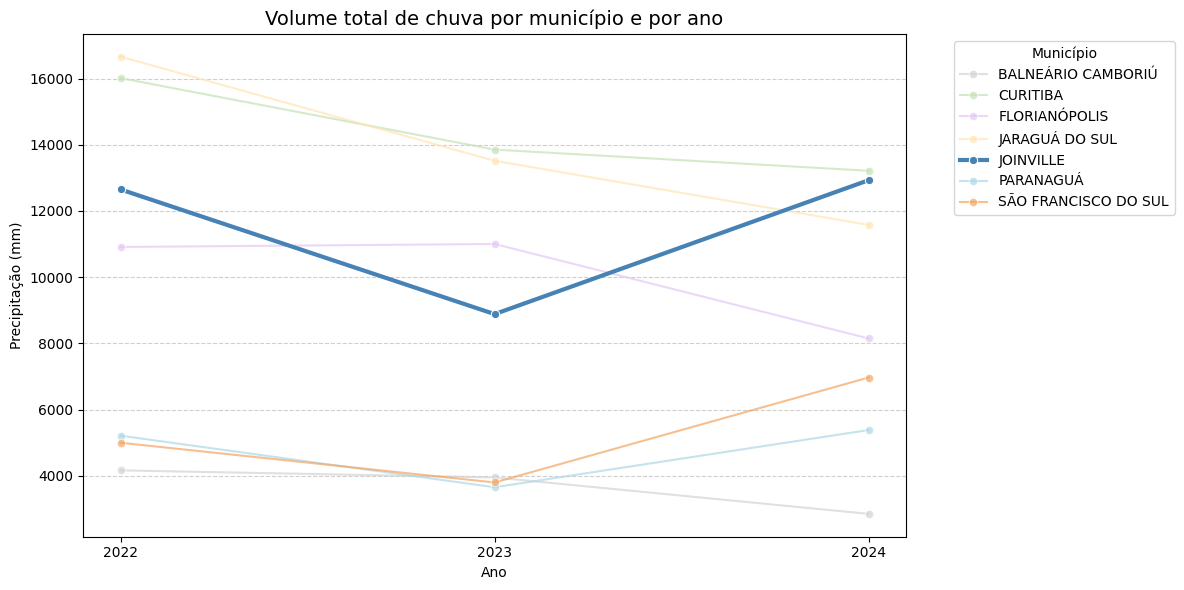

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cores_personalizadas = {
    'JOINVILLE': '#4682B4',           # azul aço (destaque principal)
    'BALNEÁRIO CAMBORIÚ': '#D3D3D3',  # cinza claro
    'CURITIBA': '#C3E2B4',            # verde suave
    'FLORIANÓPOLIS': '#E3C8F5',       # lilás claro
    'JARAGUÁ DO SUL': '#FFE4B5',      # bege claro (mocassim suave)
    'PARANAGUÁ': '#ADD8E6',           # azul claro (diferente do azul aço de Joinville)
    'SÃO FRANCISCO DO SUL': '#F4A460' # areia (sandybrown), quente e neutra
}

plt.figure(figsize=(12, 6))

# Traçar cada município individualmente
for municipio in resumo_anual['municipio'].unique():
    dados_municipio = resumo_anual[resumo_anual['municipio'] == municipio]
    espessura = 3 if municipio == 'JOINVILLE' else 1.5
    transparencia = 1.0 if municipio == 'JOINVILLE' else 0.7

    sns.lineplot(
        data=dados_municipio,
        x='ano',
        y='soma_mm',
        label=municipio,
        linewidth=espessura,
        marker='o',
        alpha=transparencia,
        color=cores_personalizadas[municipio]
    )

# Título e eixos
plt.title('Volume total de chuva por município e por ano', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Precipitação (mm)')
plt.xticks(ticks=sorted(resumo_anual['ano'].unique()))
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legenda externa
plt.legend(title='Município', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 📊 Etapa 05 – Visualização Comparativa por Ano

**Objetivos:**
- 📈 Visualizar o volume total de chuva por município ao longo dos anos (2022, 2023, 2024).
- 🧠 Facilitar a identificação de padrões, variações ou picos de precipitação por cidade.
- 🎯 Apoiar a narrativa visual do projeto “Chuville”, destacando se Joinville se mantém entre as cidades mais chuvosas.

### Estratégia:
- Transformar a tabela em formato *wide* (com anos como colunas).
- Gerar gráfico de barras com os valores por ano, comparando municípios lado a lado.

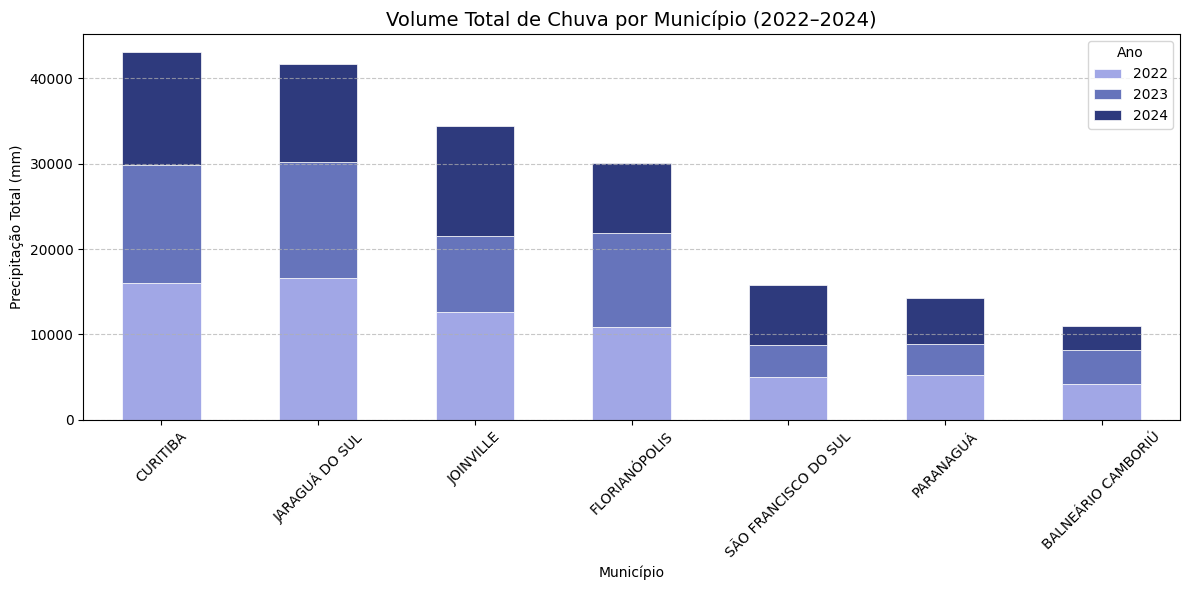

In [7]:
import matplotlib.pyplot as plt

# Transformar o DataFrame para formato wide (anos como colunas)
resumo_pivot = resumo_anual.pivot(index='municipio', columns='ano', values='soma_mm')

# Ordenar os municípios pela soma total de precipitação nos três anos
resumo_pivot['total'] = resumo_pivot.sum(axis=1)
resumo_pivot = resumo_pivot.sort_values(by='total', ascending=False)
resumo_pivot = resumo_pivot.drop(columns='total')

# Cores por ano (tons de azul progressivos para refletir o tema da chuva)
tons_azul_ano = {
    2022: "#A1A7E6",  # azul claro
    2023: "#6674BB",  # azul médio
    2024: "#2E3A7D"   # azul escuro
}

# Plotar gráfico de barras empilhadas com bordas brancas entre os anos
resumo_pivot.plot(
    kind='bar',
    stacked=True,
    color=[tons_azul_ano[ano] for ano in resumo_pivot.columns],
    edgecolor='white',
    linewidth=0.5,
    figsize=(12, 6)
)

# Configurações visuais e de storytelling
plt.title('Volume Total de Chuva por Município (2022–2024)', fontsize=14)
plt.xlabel('Município')
plt.ylabel('Precipitação Total (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

## 🌧️ Etapa 06 – Frequência de Dias com Chuva

**Objetivos:**
- Identificar quais municípios apresentam **chuvas mais frequentes** ao longo dos anos.
- Verificar se Joinville realmente “está sempre chovendo”, conforme a percepção popular.
- Complementar a análise de intensidade (Etapa 06) com uma **perspectiva de recorrência**.

### Estratégia:
- Extrair apenas a **data** (desconsiderando a hora) de cada medição.
- Contar, para cada município, o número de **dias distintos com chuva registrada** (chuvas > 0 mm).

### Interpretação:
- Joinville lidera **com folga**, com mais de **140 dias a mais** de chuva do que Curitiba.
- Mesmo que não apresente a maior média por medição (Etapa 06), ela aparece como a **mais constante** em termos de dias chuvosos.
- Esse dado ajuda a explicar por que a cidade é conhecida como “Chuville” – é **menos sobre intensidade e mais sobre constância**.

In [8]:
# Extrair apenas a data (remover a hora)
dt_total['data'] = dt_total['datahora'].dt.date

# Contar frequência de dias com chuva (> 0 mm)
freq_dias = (
    dt_total[dt_total['valorMedida'] > 0]
    .groupby(['municipio', 'data'])
    .size()
    .reset_index(name='ocorrencias')
    .groupby('municipio')
    .size()
    .reset_index(name='dias_com_chuva')
    .sort_values('dias_com_chuva', ascending=False)
)

# Exibir a tabela
display(freq_dias)

,municipio,dias_com_chuva
4,JOINVILLE,988
2,FLORIANÓPOLIS,881
1,CURITIBA,759
3,JARAGUÁ DO SUL,737
5,PARANAGUÁ,659
0,BALNEÁRIO CAMBORIÚ,644
6,SÃO FRANCISCO DO SUL,643


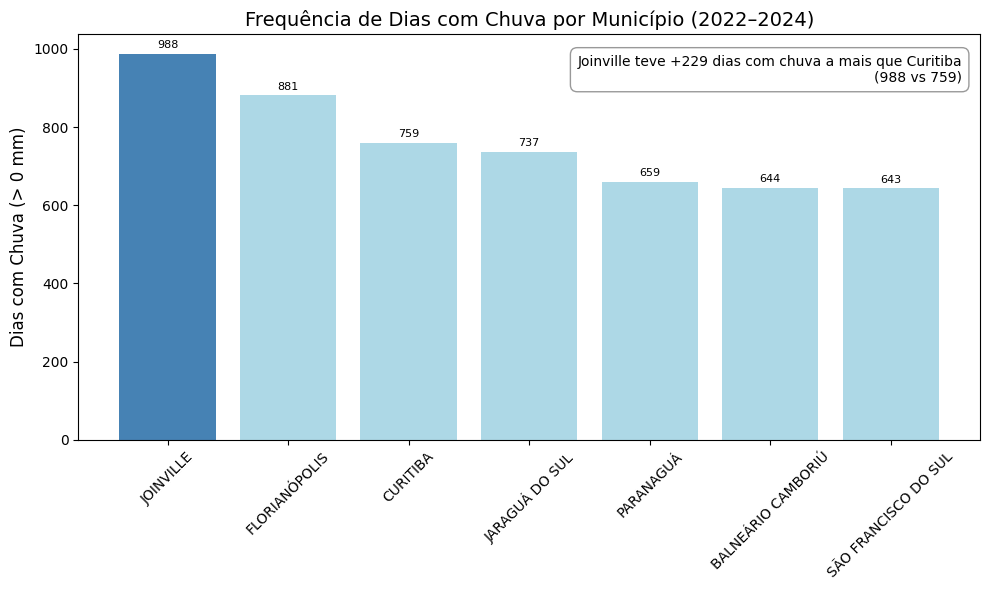

In [9]:
import matplotlib.pyplot as plt

# Dados
municipios = freq_dias['municipio']
dias_com_chuva = freq_dias['dias_com_chuva']
cores = ['#4682B4' if m == 'JOINVILLE' else '#ADD8E6' for m in municipios]

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(municipios, dias_com_chuva, color=cores)

# Título e eixos
ax.set_title('Frequência de Dias com Chuva por Município (2022–2024)', fontsize=14)
ax.set_ylabel('Dias com Chuva (> 0 mm)', fontsize=12)
ax.tick_params(axis='x', rotation=45)

# Mostrar os valores acima de cada barra
for i, valor in enumerate(dias_com_chuva):
    ax.text(i, valor + 10, str(valor), ha='center', va='bottom', fontsize=8)

# Adicionar anotação tipo "legenda" no canto superior direito
texto_anotacao = "Joinville teve +229 dias com chuva a mais que Curitiba\n(988 vs 759)"
props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, edgecolor='gray')
ax.text(
    0.98, 0.95, texto_anotacao,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=props
)

plt.tight_layout()
plt.show()

### 🌧️ Conclusão – A Chuville é Real?

Depois de mergulhar nos dados, fica difícil negar: **a fama de Joinville como “Chuville” tem, sim, fundamento**. Mesmo sem liderar em volume médio de chuva, a cidade se destaca de forma consistente na **frequência de dias chuvosos** — e isso faz toda a diferença na vida de quem mora lá.

Essa repetição de dias cinzas, combinada com o **clima abafado**, o **relevo cercado por morros** e a **sensação de um céu sempre nublado**, ajuda a construir uma imagem que vai além dos gráficos. Não é só sobre quanto chove, mas sobre a **presença constante da chuva no cotidiano**.

No fim das contas, os dados serviram para validar o que muitos já sentiam na pele: **a Chuville é real** — não como um recorde isolado, mas como um padrão que se repete e molda a cidade. E isso, por si só, já conta uma boa história.

---

*Fonte complementar: [Wikipedia – Joinville](https://pt.wikipedia.org/wiki/Joinville)*